# Linear Regression with Python

Linear regression is a Supervised machine Learning problem and is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). 

Assumptions of Linear Regression:


1.   Linearity - Relationship between dependant and independant variables must be Linear
2.   Homoscedasticity - The variance of residual is the same for any value of independant variable
3.   Independance - Observations are independant of each other
4.   Normality - For any kind of independant variable, dependant variable is normally distributed

# Simple Linear Regression

Mathmatically, they can be represented as below:

Simple Linear Regression: $$ y = \beta_0 + \beta_1 x $$

Hypothesis: $$y' = \beta_0 + \beta_1 x $$


Hypothesis of Simple Linear Regression is basically equation of a straight line with slope of $\beta$$_1$ and intercept of $\beta$$_0$. By varying the slope and intercept, any linear relationship between two variables can be determined.

$$ \beta_0 = \mu(y) - \beta_1 * \mu(x) $$
$$ \beta_1 = Sxy/Sxx $$

In the following graph, data is represented as green dots. As it can be inferred, when value of $\beta$$_1$ is 1 and $\beta$$_0$ is 1, trend line matches the data trend

![alt text](https://drive.google.com/uc?export=view&id=16a75p6AwrF6ZeeD-mYSWppQpX-M7vW5W)

## Error and Residual

![alt text](https://drive.google.com/uc?export=view&id=1ZuxUNExH52XLLf5TPmPJP3UDMzj4QA2Y)

A residual is the vertical distance between a data point and the regression line. Each data point has one residual. They are positive if they are above the regression line and negative if they are below the regression line. Error can be found as Absolute error, Mean Absolute error, Squared Mean Error etc.

In [1]:
#Importing important libraries

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Function to read data from csv file

def read_csv(filename):
    inc = []
    hap = []
    with open(filename) as f:
        reader = csv.reader(f)
        next(reader)
        for row in reader:
            inc.append(float(row[0]))
            hap.append(float(row[1]))
        income = np.array(inc)
        happiness = np.array(hap)
        return income, happiness

In [23]:
# Function to plot scatter plot

def scatter_plot(x, y):
    plt.scatter(x, y, color = 'green')
    plt.xlabel('income')
    plt.ylabel('happiness')
    plt.show()

In [4]:
# Function to calculate value of beta_1 i.e. slope of the line

def cal_beta_1(x,y,mean_y, mean_x) :
    diff_x = x-mean_x
    diff_y = y-mean_y
    Sxx = np.sum(diff_x**2)
    Sxy = np.sum(diff_y*diff_x)
    beta_1 = Sxy/Sxx
    return beta_1,Sxy

In [5]:
# Function to calculate value of beta_0 i.e. the intercept of the line

def cal_beta_0(x, y, mean_y, mean_x, beta_1) :
    beta_0 = mean_y - (beta_1 * mean_x)
    return beta_0   

In [7]:
# Driver Code

#Reading data from a csv file
income, happiness = read_csv('income_data.csv')

Scatter plot between observed variable and response variable :



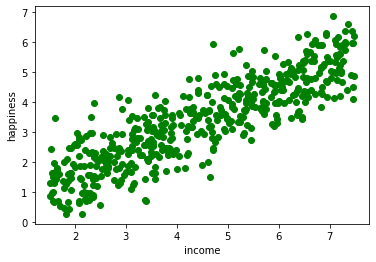

In [24]:
#Scatter plot of observed and response variable

print("Scatter plot between observed variable and response variable :\n")
scatter_plot(income, happiness)

#### Inference:
- Income and happiness are linearly related

In [9]:
#Calculating correlation matrix of observed and response variable  

correlation = np.corrcoef(income, happiness)
print("Correlation matrix is :\n",correlation)

Correlation matrix is :
 [[1.         0.86563373]
 [0.86563373 1.        ]]


#### Inference:
- There is high positive correlation between the Independent variable `Income` and Dependent variable `happiness`

In [10]:
#Calclating mean of response variable
mean_happiness = np.mean(happiness)
    
#Calculating mean of observed variable
mean_income = np.mean(income)

In [11]:
#Calculating value of slope i.e. beta_1
beta_1 ,Sxy= cal_beta_1(income, happiness, mean_happiness, mean_income)
    
#calculating value of intercept i.e. beta_0
beta_0 = cal_beta_0(income, happiness, mean_happiness, mean_income, beta_1)
    
print("\nValue of beta_0 is : {:.2f}".format(beta_0))
print("\nValue of beta_1 is : {:.2f}".format(beta_1))    


Value of beta_0 is : 0.20

Value of beta_1 is : 0.71


pred_y = 0.204 + 0.714 * income

Scatter plot between observed variable and predicted value :



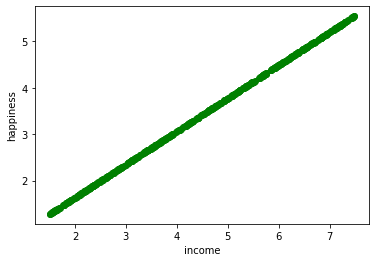

In [17]:
#Creating the fitted line

pred_y = beta_0 + beta_1 * income
print("pred_y = {:.3f} + {:.3f} * income".format(beta_0,beta_1))

#plotting fitted line
print("\nScatter plot between observed variable and predicted value :\n")
scatter_plot(income , pred_y)    

In [14]:
#Calculating error term
error = happiness - pred_y
    
#Calculating sum of squares of residuals i.e. SSres
SSres = np.sum(error**2)
    
#Calculating sum of squares of regression i.e. SSreg
SSreg = beta_1 * Sxy
    
#Calculating total sum of squares i.e. SSt
SSt = SSres + SSreg
    
#Calculating value of R-squared
R_squared = 1 - (SSres / SSt)
    
#Calculating degrees of freedom
df_res = np.size(income) - 2
df_reg = 1
df_total = np.size(income) - 1
    
#Calculating residual mean square i.e. MSres
MSres = SSres / df_res
    
#Calculating regression mean square i.e. MSreg
MSreg = SSreg / df_reg
    
#Calculating F-statistic
F = MSreg / MSres

In [15]:
print("R_squared is : {:.3f} ".format(R_squared))
print("\nANOVA Table :\n")
    
source_of_variation = ['Regression', 'Residual', 'Total']
data = [[ SSreg , df_reg, MSreg, F],[SSres, df_res, MSres], [SSt, df_total]]
df = pd.DataFrame(data, columns =['Sum of square', 'Degrees of Freedom', 'Mean Square',
                                      'F-statistic'], index = source_of_variation)
print(df)

R_squared is : 0.749 

ANOVA Table :

            Sum of square  Degrees of Freedom  Mean Square  F-statistic
Regression     764.546359                   1   764.546359  1482.632007
Residual       255.771488                 496     0.515668          NaN
Total         1020.317847                 497          NaN          NaN


##### Inference :

1. *R-sqaured  (extent of fit)* - 0.749  - `75%` variance explained.